In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("ad_vs_sales.csv")
adf = pd.read_csv("Dhaka Rent.csv", sep=";")

In [3]:
adf.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.head()


,Ad_Expense,Sales
0,37.45,55.64
1,95.07,145.42
2,73.20,115.41
3,59.87,86.67
4,15.60,50.50


In [5]:
df.shape

(200, 2)

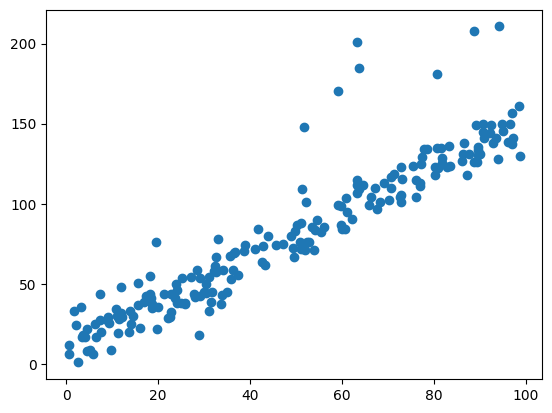

In [6]:
plt.scatter(df['Ad_Expense'], df['Sales'])

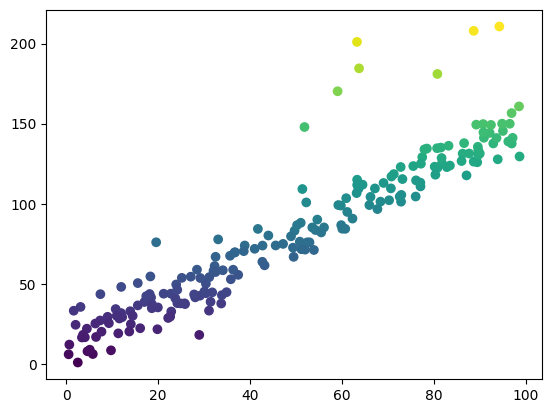

In [7]:
plt.scatter(df['Ad_Expense'], df['Sales'],c=df['Sales'])

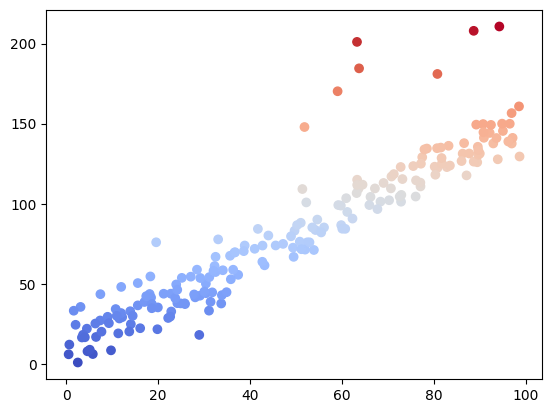

In [8]:
plt.scatter(df['Ad_Expense'], df['Sales'], c=df['Sales'], cmap='coolwarm')

Text(0.5, 1.0, 'Ads vs Sales')

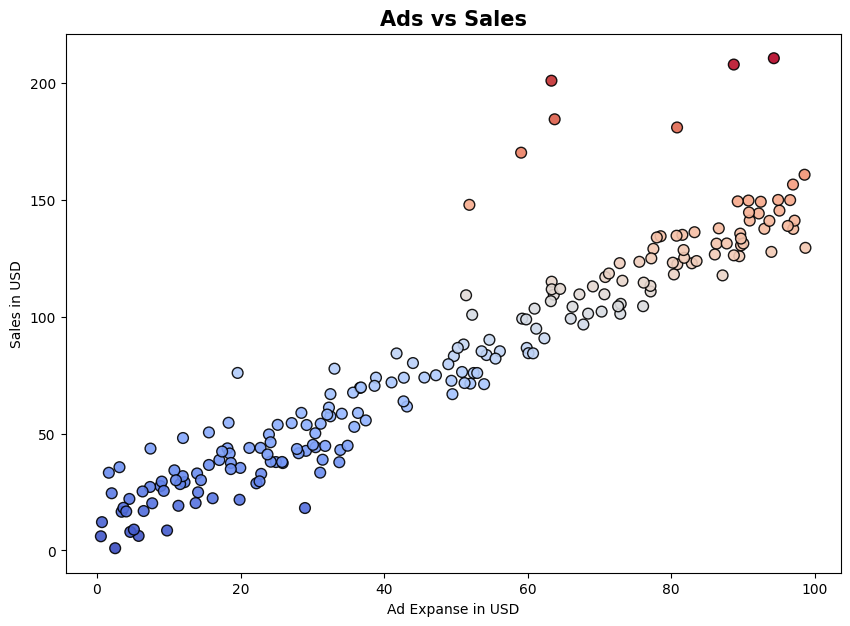

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(df['Ad_Expense'], df['Sales'], c=df['Sales'], cmap='coolwarm',s=60,alpha=.9,edgecolors='k')
plt.xlabel("Ad Expanse in USD")
plt.ylabel('Sales in USD')
plt.title("Ads vs Sales",fontsize=15,weight="bold")

In [10]:
df.corr()

,Ad_Expense,Sales
Ad_Expense,1.000000,0.930611
Sales,0.930611,1.000000


Linear Regression with Hardcoded Formula

In [11]:
x = df['Ad_Expense']
y= df['Sales']
dev_x = x - np.mean(x)
dev_y = y - np.mean(y)


In [12]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x ** 2)
m

np.float64(1.4615257314414671)

In [13]:
c = np.mean(y) - (m * np.mean(x))
c

np.float64(10.305535377647857)

In [14]:
df.head()

,Ad_Expense,Sales
0,37.45,55.64
1,95.07,145.42
2,73.20,115.41
3,59.87,86.67
4,15.60,50.50


In [15]:
m*95.07 + c

np.float64(149.25278666578814)

In [16]:
m*73.20 + c

np.float64(117.28921891916326)

Linear Regression using SKLEARN

In [17]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()

In [18]:
reg.fit(df[['Ad_Expense']],y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
reg.coef_

array([1.46152573])

In [20]:
reg.intercept_

np.float64(10.305535377647843)

In [21]:
reg.predict([[95.07]])

d:\ML-in-python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([149.25278667])

In [22]:
reg.predict(df[['Ad_Expense']])

array([ 65.03967402, 149.25278667, 117.28921892,  97.80708092,
        33.10533679,  33.10533679,  18.79699988, 136.90289424,
        98.15784709, 113.79617242,  13.31627838, 152.05891607,
       131.96293726,  41.33372666,  36.87607318,  37.10991729,
        54.76514813,  87.00640576,  73.42883172,  52.86516468,
        99.73629488,  30.69381933,  52.99670199,  63.85583818,
        76.96572399, 125.06453581,  39.49220423,  85.45718849,
        96.88631971,  17.10163003,  99.09322356,  35.2245491 ,
        19.82006789, 148.98971203, 151.43046001, 128.45527551,
        54.82360916,  24.58464177, 110.30312592,  74.64189808,
        28.1361493 ,  82.6802896 ,  15.33318389, 143.20207014,
        48.12982131, 107.13161509,  55.86129243,  86.31948867,
        90.20714712,  37.32914615, 152.0150703 , 123.58839482,
       147.61587785, 141.08285783,  97.69015886, 145.04359256,
        23.2400381 ,  38.95143971,  16.91163168,  57.84896742,
        67.11504056,  49.95672847, 131.42217274,  62.45

In [23]:
df2 = df.copy()

In [24]:
df2['Predicted'] = reg.predict(df[['Ad_Expense']])
df2.head()

,Ad_Expense,Sales,Predicted
0,37.45,55.64,65.039674
1,95.07,145.42,149.252787
2,73.20,115.41,117.289219
3,59.87,86.67,97.807081
4,15.60,50.50,33.105337


In [25]:
df2.tail()

,Ad_Expense,Sales,Predicted
195,34.92,44.81,61.342014
196,72.60,104.45,116.412303
197,89.71,133.46,141.419009
198,88.71,207.92,139.957483
199,77.99,133.94,124.289927


In [26]:
reg.score(df[['Ad_Expense']], df[['Sales']])

0.8660362663371463

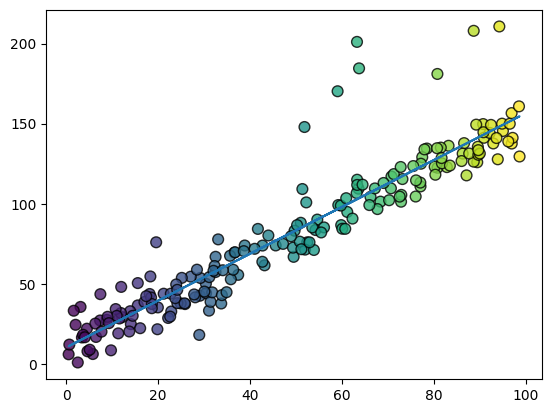

In [27]:
plt.plot(df[['Ad_Expense']], reg.predict(df[['Ad_Expense']]))
plt.scatter(df['Ad_Expense'], df['Sales'], c=df['Ad_Expense'],s=60,alpha=0.8,edgecolors='k')

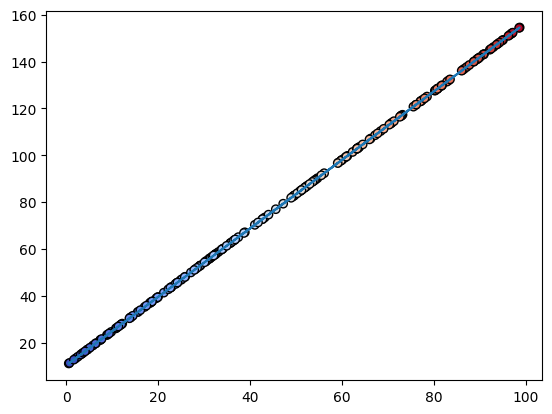

In [28]:
plt.plot(df[['Ad_Expense']], reg.predict(df[['Ad_Expense']]))
plt.scatter(df['Ad_Expense'], reg.predict(df[['Ad_Expense']]),c=df['Ad_Expense'],cmap='coolwarm',edgecolors='k')

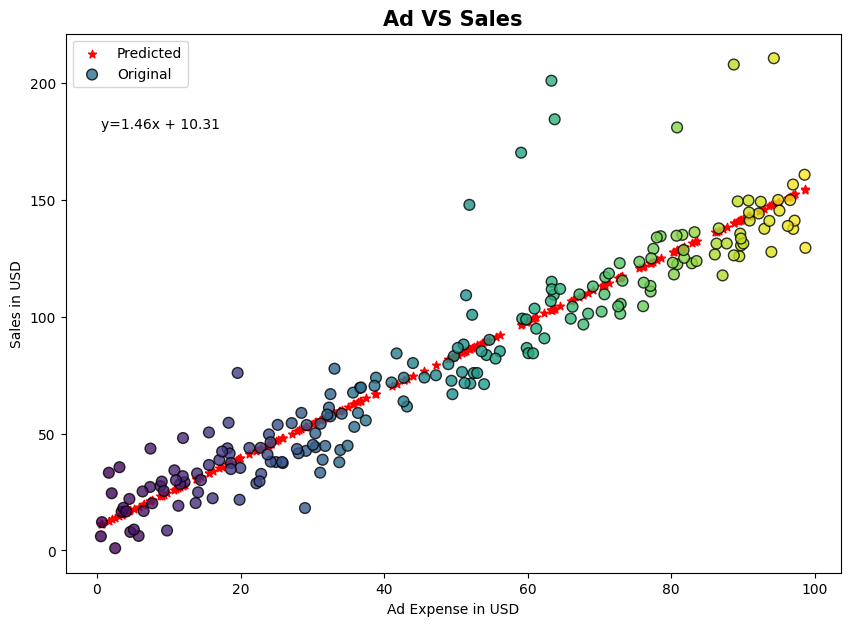

In [29]:
# plt.plot(df[['Ad_Expense']], reg.predict(df[['Ad_Expense']]))
plt.figure(figsize=(10,7))
m=reg.coef_[0]
c=reg.intercept_
equ = f'y={float(m):.2f}x + {float(c):.2f}'
plt.text(min(df["Ad_Expense"]), max(df["Sales"])-30, equ)
plt.scatter(df['Ad_Expense'], reg.predict(df[['Ad_Expense']]),color="red",marker='*',label="Predicted")
plt.scatter(df['Ad_Expense'], df['Sales'], c=df['Ad_Expense'],s=60,alpha=0.8,edgecolors='k',label="Original")
plt.xlabel('Ad Expense in USD')
plt.ylabel('Sales in USD')
plt.title("Ad VS Sales",fontsize=15, weight='bold')
plt.plot()
plt.legend()
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(df[["Sales"]], reg.predict(df[['Ad_Expense']]))

285.894129853258

In [31]:
mean_absolute_error(df[["Sales"]], reg.predict(df[['Ad_Expense']]))

10.353198003118623